# Buoi 14 | keras-mnist

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1Krse8N0ZNTUfehjpW9YUgKO-WwNN2H09/view?usp=sharing)

In [ ]:
# 1. import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
print(X_val.shape)

11501568/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)


In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 48s 4ms/step - loss: 0.6337 - accuracy: 0.8162 - val_loss: 0.0696 - val_accuracy: 0.9824
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0613 - accuracy: 0.9828 - val_loss: 0.0564 - val_accuracy: 0.9839
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9895 - val_loss: 0.0565 - val_accuracy: 0.9835
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0211 - accuracy: 0.9948 - val_loss: 0.0395 - val_accuracy: 0.9882
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.0433 - val_accuracy: 0.9867
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.0503 - val_accuracy: 0.9858
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0415 - val_accuracy

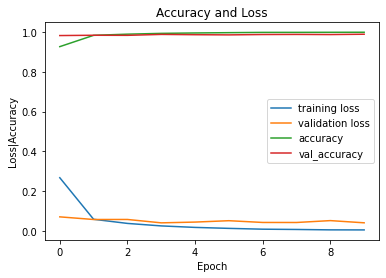

In [ ]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.034229591488838196, 0.9894999861717224]


Giá trị dự đoán:  9


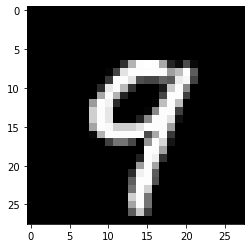

In [ ]:
# 10. Dự đoán ảnh
plt.imshow(X_test[12].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[12].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))